(<matplotlib.image.AxesImage at 0x173f71f3450>,
 <matplotlib.colorbar.Colorbar at 0x173f4c42510>)

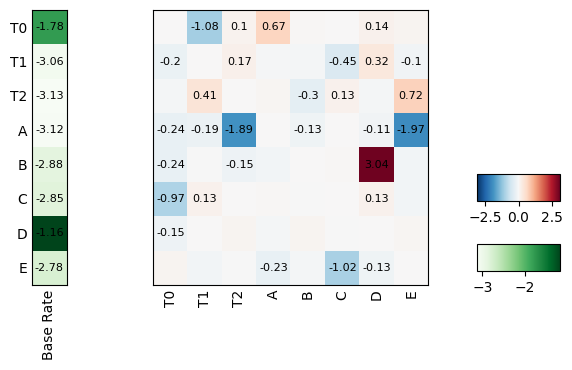

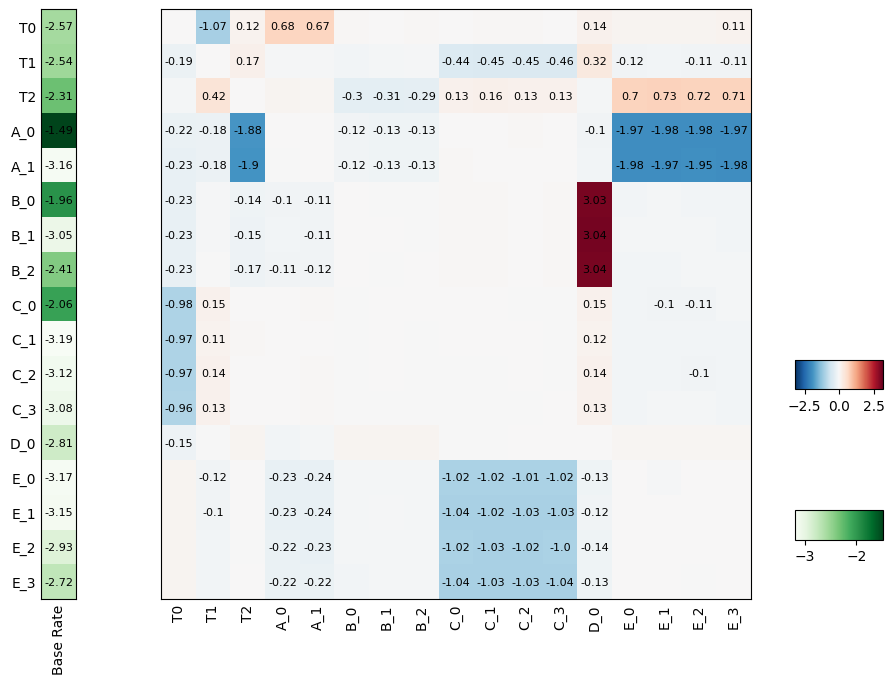

In [8]:
import sys

sys.path.append("..")


import mhn
import ClusterableMhnGenerator as cmg
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

np.random.seed(12345)

generator = cmg.ClusterableMhnGenerator(3,5)
generator.randomizeBaseRates()
generator.getMHN().log_theta[4,6]=3
generator.getMHN().log_theta[3,7]=-2
generator.getMHN().log_theta[2,4]=-0.3
generator.getMHN().log_theta[7,5]=-0.9
generator.getMHN().log_theta[0,1]=-1.2
generator.getMHN().log_theta[2,1]=0.4
generator.getMHN().log_theta[3,2]=-1.8
generator.getMHN().log_theta[1,5]=-0.5
generator.getMHN().log_theta[2,7]=0.8
generator.getMHN().log_theta[0,3]=0.8
generator.getMHN().log_theta[5,0]=-1.0





generator.addNoiseOffDiags(0.1)

generator.getMHN().plot()
generator.splitClusters([2,3,4,1,4]).randomizeBaseRates().addNoiseOffDiags(0.01,generator.CMG_Domain.TOTAL)
#generator.addNoiseOffDiags(0.2, generator.CMG_Domain.CLUSTER, generator.CMG_Domain.TEST)

ground_truth_mhn = generator.getMHN()
ground_truth_mhn.plot()

In [2]:
sampled_data=ground_truth_mhn.sample_artificial_data(100000, as_dataframe=True)

#compute distances based on the distances of redcued MHNs including the test events T1,..,TN
test_events= generator.events[generator.CMG_Step.SPLIT][generator.CMG_Domain.TEST]
events= generator.events[generator.CMG_Step.SPLIT][generator.CMG_Domain.CLUSTER]

print(sampled_data)


       T0  T1  T2  A_0  A_1  B_0  B_1  B_2  C_0  C_1  C_2  C_3  D_0  E_0  E_1  \
0       0   0   0    0    0    0    0    0    0    0    0    0    0    0    0   
1       0   0   0    0    0    0    0    0    0    0    0    0    0    0    0   
2       0   0   0    0    0    0    0    0    0    0    0    0    0    0    0   
3       0   0   0    0    0    0    0    0    0    0    0    0    0    0    0   
4       0   0   0    0    0    0    0    0    0    0    0    0    0    0    0   
...    ..  ..  ..  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
99995   0   0   0    0    0    0    0    0    0    0    0    0    0    0    0   
99996   0   0   0    0    0    1    0    1    1    0    0    0    1    0    0   
99997   0   0   0    0    0    0    0    0    0    0    0    0    0    0    0   
99998   0   0   0    0    0    0    0    0    0    0    0    0    1    0    0   
99999   0   0   1    0    0    0    0    1    1    0    0    0    0    0    0   

       E_2  E_3  
0        

In [ ]:
import EventDistanceMeasurer as edm

dist_measurer=edm.EventDistanceMeasurer(test_events, events)
dist_measurer.load_data(sampled_data)
dist_measurer.train_All_MHNs()
dist_measurer.saveto("mbonart_checkpoints/mhn0")
#dist_measurer.loadfrom("mbonart_checkpoints/mhn0")


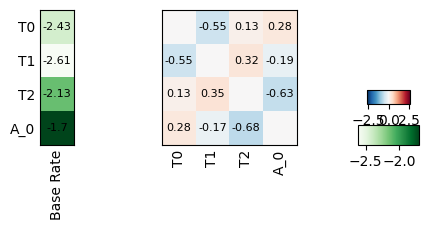

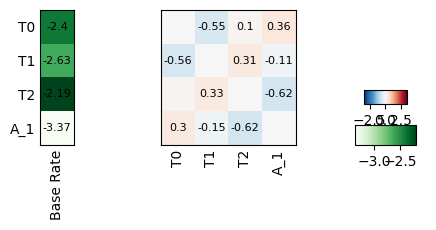

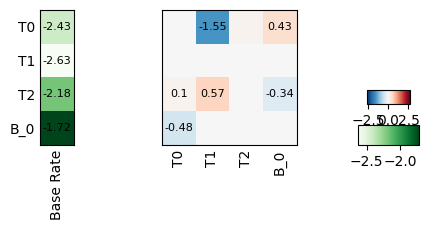

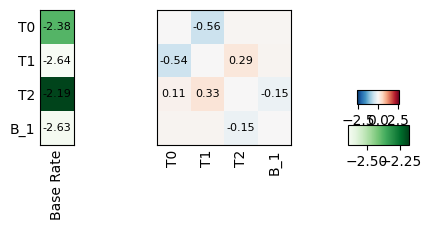

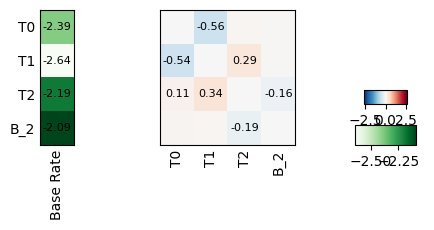

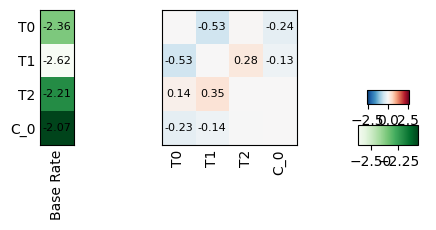

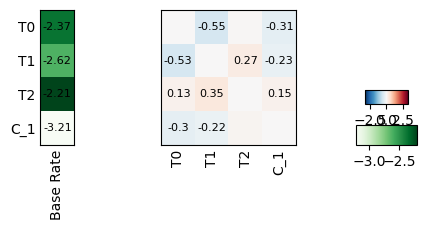

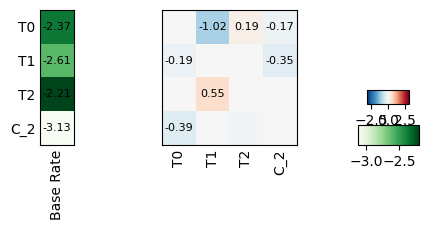

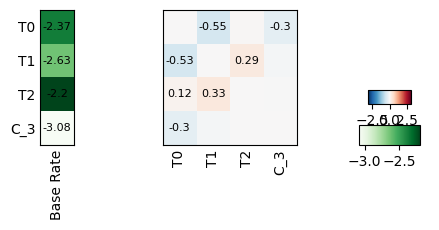

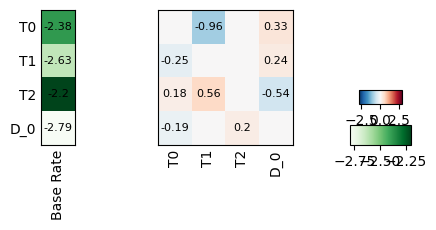

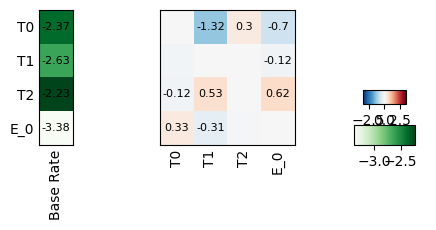

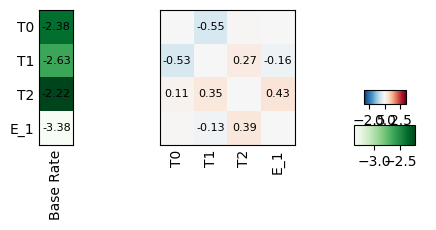

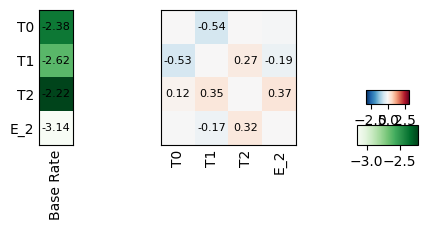

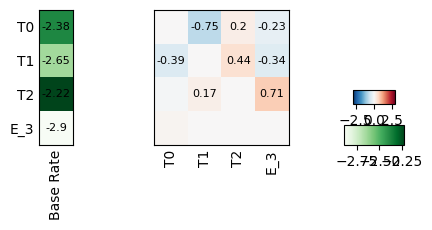

In [ ]:
for ev in events:
    dist_measurer._mhns[ev].plot()

get func for DistMeasure.OFFDIAG_EUCLID
Distance function: <function euclid_dist_offdiag at 0x00000173F27BEB60>


<Axes: >

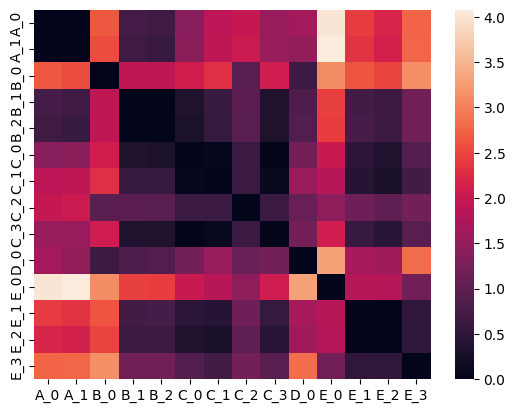

In [11]:
dist_measurer.compute_distance_matrix(dist_measurer.DistMeasure.OFFDIAG_EUCLID)
sns.heatmap(dist_measurer._dist_mat)

C:\Users\michi\AppData\Local\Temp\ipykernel_21076\2013450603.py:6: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = scipy.cluster.hierarchy.linkage(dist_measurer._dist_mat)


{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [55.0, 55.0, 65.0, 65.0],
  [75.0, 75.0, 85.0, 85.0],
  [105.0, 105.0, 115.0, 115.0],
  [95.0, 95.0, 110.0, 110.0],
  [80.0, 80.0, 102.5, 102.5],
  [60.0, 60.0, 91.25, 91.25],
  [45.0, 45.0, 75.625, 75.625],
  [35.0, 35.0, 60.3125, 60.3125],
  [125.0, 125.0, 135.0, 135.0],
  [47.65625, 47.65625, 130.0, 130.0],
  [20.0, 20.0, 88.828125, 88.828125],
  [5.0, 5.0, 54.4140625, 54.4140625]],
 'dcoord': [[0.0, 0.24371220732659285, 0.24371220732659285, 0.0],
  [0.0, 0.11445234816289285, 0.11445234816289285, 0.0],
  [0.0, 0.4531907104078811, 0.4531907104078811, 0.0],
  [0.0, 0.2859077473591786, 0.2859077473591786, 0.0],
  [0.0, 0.8601382214504829, 0.8601382214504829, 0.2859077473591786],
  [0.4531907104078811,
   0.9398026920582853,
   0.9398026920582853,
   0.8601382214504829],
  [0.11445234816289285,
   1.5545130427243126,
   1.5545130427243126,
   0.9398026920582853],
  [0.0, 1.9528696116228548, 1.9528696116228548, 1.5545130427243126],
  [0.0, 2.250072

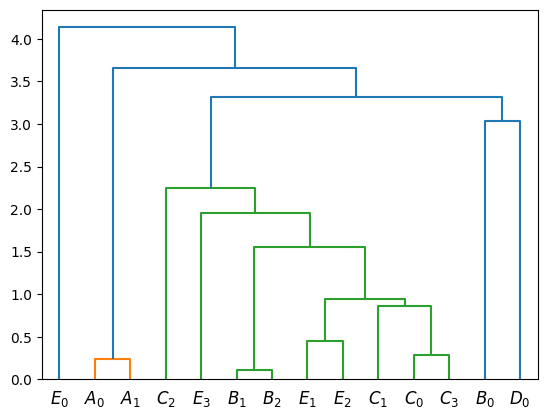

In [16]:
import scipy.spatial
import scipy.cluster

#condensed_dist_mat=scipy.spatial.distance.squareform(dist_measurer._dist_mat)

linkage = scipy.cluster.hierarchy.linkage(dist_measurer._dist_mat)
scipy.cluster.hierarchy.dendrogram(linkage, labels= [f"${ev}$" for ev in dist_measurer._events])